## Algerian Forest Fires Dataset 
Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 11 attribues and 1 output attribue (class)
The 244 instances have been classified into fire(138 classes) and not fire (106 classes) classes.

Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("/config/workspace/dataset/Algerian_forest_fire.csv",)

In [3]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          242 non-null    int64  
 1   month        242 non-null    int64  
 2   year         242 non-null    int64  
 3   Temperature  242 non-null    int64  
 4   RH           242 non-null    int64  
 5   Ws           242 non-null    int64  
 6   Rain         242 non-null    float64
 7   FFMC         242 non-null    float64
 8   DMC          242 non-null    float64
 9   DC           242 non-null    float64
 10  ISI          242 non-null    float64
 11  BUI          242 non-null    float64
 12  FWI          242 non-null    float64
 13  Classes      242 non-null    object 
 14  Region       242 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.5+ KB


In [5]:
## Data cleaning

In [6]:
data[data.isnull().any(axis =1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


The dataset is converted into two sets based on Region from 122th index, we can make a new column based on the Region

1 : "Bejaia Region Dataset"

2 : "Sidi-Bel Abbes Region Dataset"

Add new column with region

In [7]:
# data before 122 index belongs to sidi bel region
# data after 122 index belongs to bejaia region

data.loc[:122,"Region"]=0
data.loc[122:, "Region"] =1
df= data

In [8]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
238,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
239,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
240,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          242 non-null    int64  
 1   month        242 non-null    int64  
 2   year         242 non-null    int64  
 3   Temperature  242 non-null    int64  
 4   RH           242 non-null    int64  
 5   Ws           242 non-null    int64  
 6   Rain         242 non-null    float64
 7   FFMC         242 non-null    float64
 8   DMC          242 non-null    float64
 9   DC           242 non-null    float64
 10  ISI          242 non-null    float64
 11  BUI          242 non-null    float64
 12  FWI          242 non-null    float64
 13  Classes      242 non-null    object 
 14  Region       242 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.5+ KB


In [10]:
df["Region"] = df["Region"].astype(int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          242 non-null    int64  
 1   month        242 non-null    int64  
 2   year         242 non-null    int64  
 3   Temperature  242 non-null    int64  
 4   RH           242 non-null    int64  
 5   Ws           242 non-null    int64  
 6   Rain         242 non-null    float64
 7   FFMC         242 non-null    float64
 8   DMC          242 non-null    float64
 9   DC           242 non-null    float64
 10  ISI          242 non-null    float64
 11  BUI          242 non-null    float64
 12  FWI          242 non-null    float64
 13  Classes      242 non-null    object 
 14  Region       242 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.5+ KB


In [12]:
## check for null values and drop all null values

In [13]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [14]:
df = df.dropna().reset_index(drop=True)

In [15]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [16]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1


In [17]:
df = df.drop(122).reset_index(drop=True)

In [18]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1


In [19]:
## now change the data type of remanig variables

In [20]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [21]:
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          241 non-null    int64  
 1   month        241 non-null    int64  
 2   year         241 non-null    int64  
 3   Temperature  241 non-null    int64  
 4   RH           241 non-null    int64  
 5   Ws           241 non-null    int64  
 6   Rain         241 non-null    float64
 7   FFMC         241 non-null    float64
 8   DMC          241 non-null    float64
 9   DC           241 non-null    float64
 10  ISI          241 non-null    float64
 11  BUI          241 non-null    float64
 12  FWI          241 non-null    float64
 13  Classes      241 non-null    object 
 14  Region       241 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.4+ KB


In [23]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          241 non-null    int64  
 1   month        241 non-null    int64  
 2   year         241 non-null    int64  
 3   Temperature  241 non-null    int64  
 4   RH           241 non-null    int64  
 5   Ws           241 non-null    int64  
 6   Rain         241 non-null    float64
 7   FFMC         241 non-null    float64
 8   DMC          241 non-null    float64
 9   DC           241 non-null    float64
 10  ISI          241 non-null    float64
 11  BUI          241 non-null    float64
 12  FWI          241 non-null    float64
 13  Classes      241 non-null    object 
 14  Region       241 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.4+ KB


In [25]:
df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']] = df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          241 non-null    int64  
 1   month        241 non-null    int64  
 2   year         241 non-null    int64  
 3   Temperature  241 non-null    int64  
 4   RH           241 non-null    int64  
 5   Ws           241 non-null    int64  
 6   Rain         241 non-null    float64
 7   FFMC         241 non-null    float64
 8   DMC          241 non-null    float64
 9   DC           241 non-null    float64
 10  ISI          241 non-null    float64
 11  BUI          241 non-null    float64
 12  FWI          241 non-null    float64
 13  Classes      241 non-null    object 
 14  Region       241 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.4+ KB


In [27]:
# 5 number summary
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,241.000000,241.000000,241.0,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,15.879668,7.514523,2012.0,32.161826,61.958506,15.518672,0.749793,78.020332,14.780913,49.774689,4.776763,16.805394,7.092116,0.493776
std,8.782442,1.110929,0.0,3.640449,14.861525,2.809334,2.000607,14.274480,12.395199,47.712892,4.154190,14.231143,7.445187,0.501002
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.600000,5.800000,14.700000,1.400000,6.100000,0.800000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.700000,11.300000,33.400000,3.500000,12.500000,4.700000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,74.000000,17.000000,0.500000,88.300000,20.900000,71.000000,7.300000,22.900000,11.600000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [28]:
## save the cleaned data set

In [29]:
df.to_csv("Algerian_forest_fire.csv" , index=False)

## Exploratory Data Analysis

In [30]:
df_copy = df.drop(['day', 'month', 'year'] , axis=1)

In [31]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [32]:
## categorical counts in class variable

In [33]:
df_copy['Classes'].value_counts()

Classes
fire             131
not fire          99
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [34]:
## Encoding the categories 

In [35]:
df_copy["Classes"] = np.where(df_copy["Classes"].str.contains("not fire"),0,1)

In [36]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [37]:
df_copy.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
236,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
237,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
238,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
239,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
240,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [38]:
df_copy["Classes"].value_counts()

Classes
1    137
0    104
Name: count, dtype: int64

In [39]:
## plot density plot for all features

/tmp/ipykernel_653/571572987.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


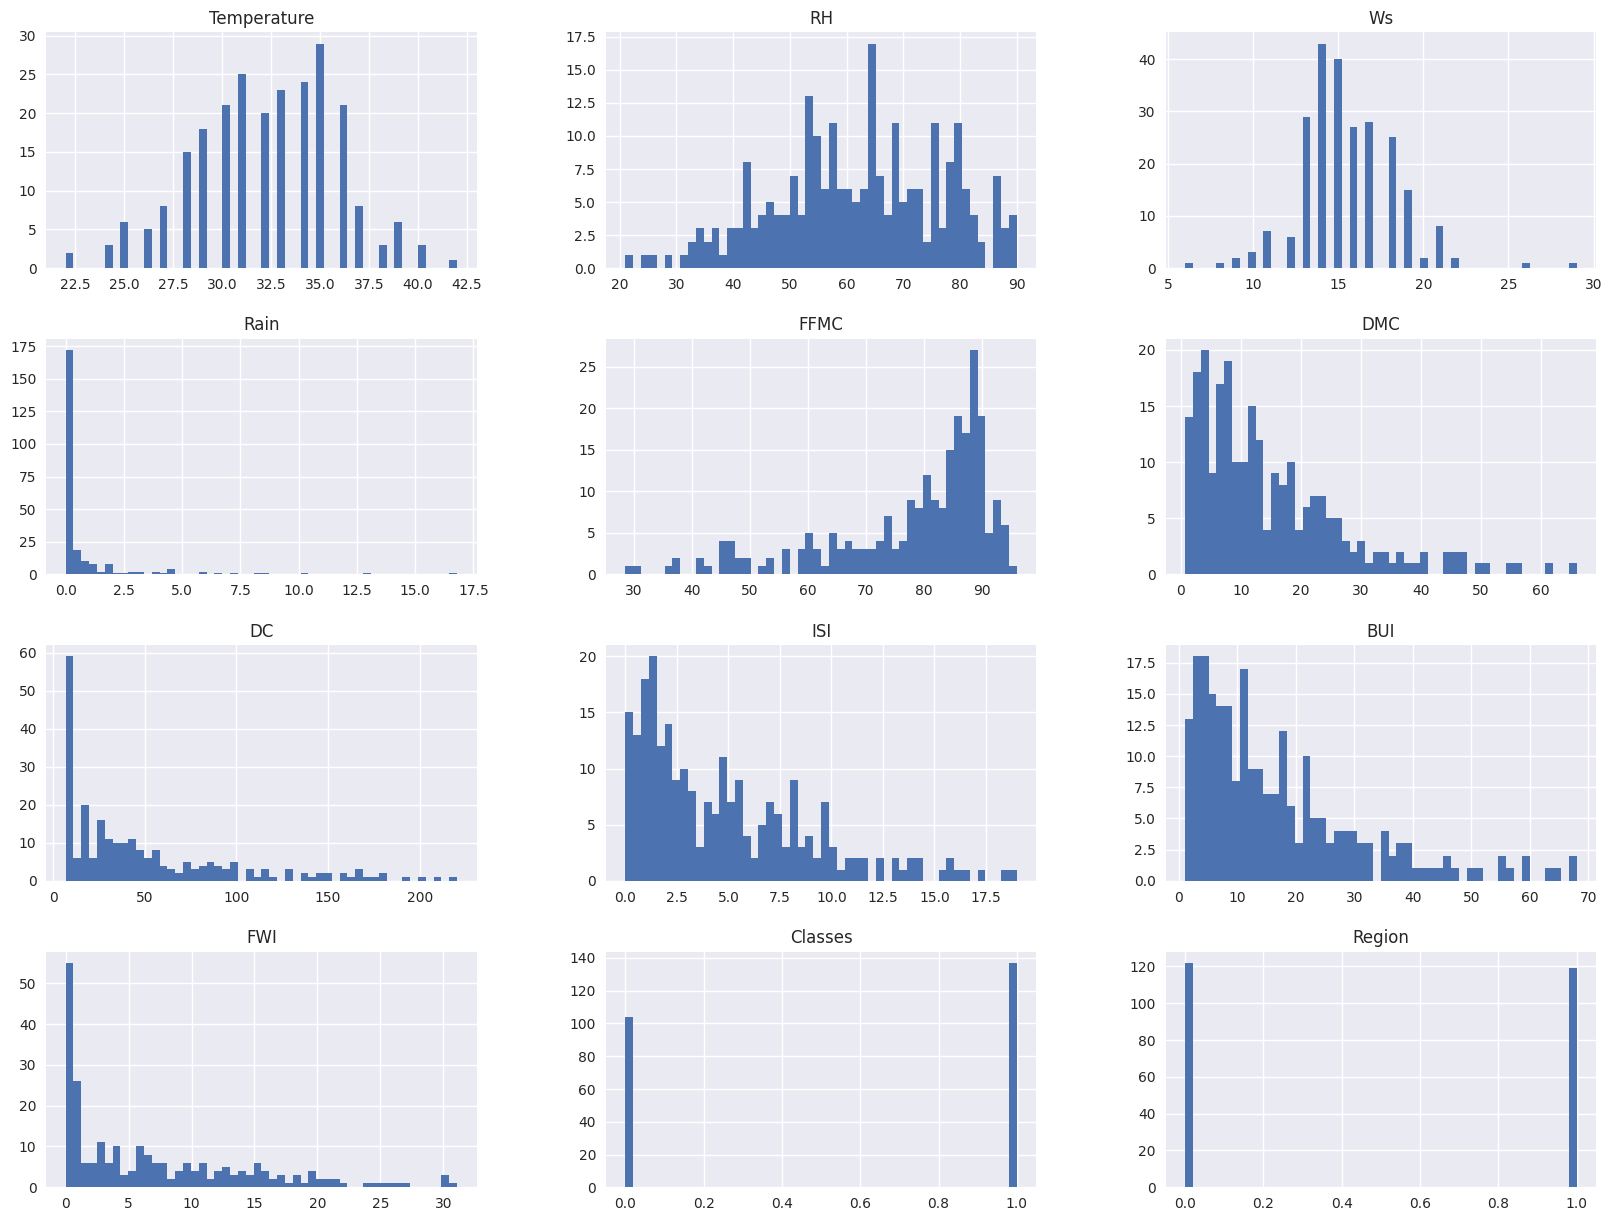

In [40]:
plt.style.use("seaborn")
df_copy.hist(bins=50 , figsize=(20,15))
plt.show()

In [41]:
## Percentage of pie chart
percent = df_copy["Classes"].value_counts(normalize=True)*100

In [42]:
percent

Classes
1    56.846473
0    43.153527
Name: proportion, dtype: float64

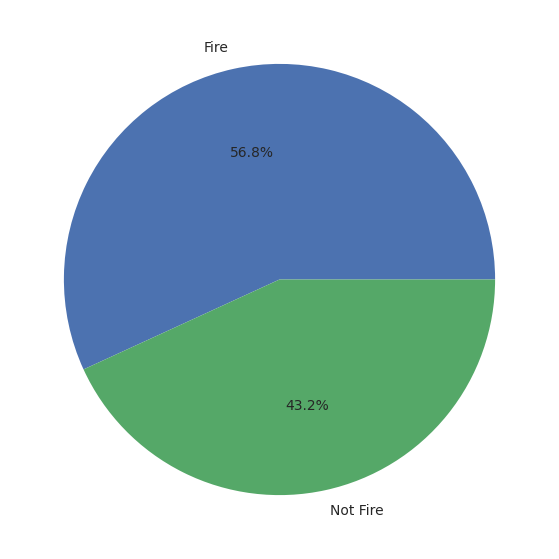

In [43]:
## plot pie chart
classlabels = ["Fire" , "Not Fire"]
plt.figure(figsize=(12,7))
plt.pie(percent,labels=classlabels, autopct= '%1.1f%%')
plt.show()

## Correlation

In [44]:
## check the correlation and plot heat map
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651184,-0.288538,-0.324519,0.679353,0.485406,0.375432,0.604182,0.459374,0.566649,0.516166,0.273554
RH,-0.651184,1.000000,0.251609,0.219067,-0.643718,-0.405444,-0.223201,-0.685228,-0.350446,-0.578951,-0.428928,-0.410789
Ws,-0.288538,0.251609,1.000000,0.179167,-0.182322,-0.009466,0.072004,-0.000320,0.023004,0.024420,-0.080857,-0.173839
Rain,-0.324519,0.219067,0.179167,1.000000,-0.541693,-0.285066,-0.294782,-0.344192,-0.296227,-0.321227,-0.375657,-0.047080
FFMC,0.679353,-0.643718,-0.182322,-0.541693,1.000000,0.599438,0.502847,0.737525,0.587699,0.688538,0.766622,0.237933
DMC,0.485406,-0.405444,-0.009466,-0.285066,0.599438,1.000000,0.875084,0.677847,0.982107,0.874943,0.581867,0.201872
DC,0.375432,-0.223201,0.072004,-0.294782,0.502847,0.875084,1.000000,0.505104,0.941620,0.737783,0.507224,-0.072004
ISI,0.604182,-0.685228,-0.000320,-0.344192,0.737525,0.677847,0.505104,1.000000,0.641194,0.922326,0.732736,0.273803
BUI,0.459374,-0.350446,0.023004,-0.296227,0.587699,0.982107,0.941620,0.641194,1.000000,0.856918,0.582868,0.098330
FWI,0.566649,-0.578951,0.024420,-0.321227,0.688538,0.874943,0.737783,0.922326,0.856918,1.000000,0.716898,0.206362


<Axes: >

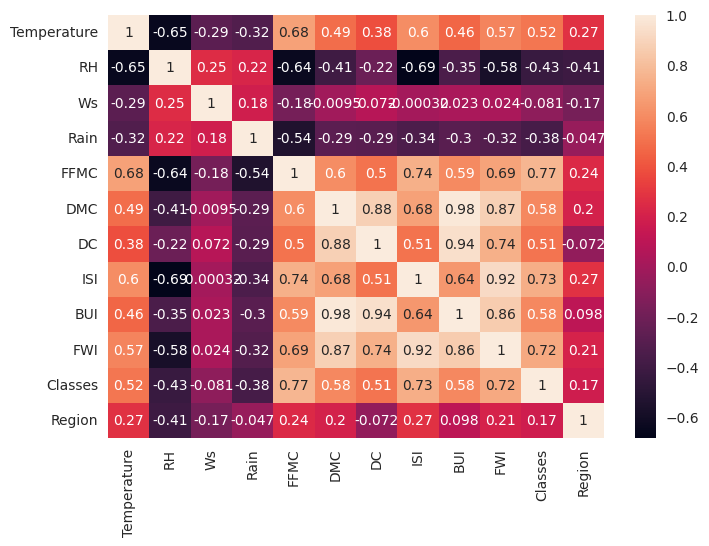

In [45]:
sns.heatmap(df_copy.corr(),annot=True)

In [46]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


<Axes: >

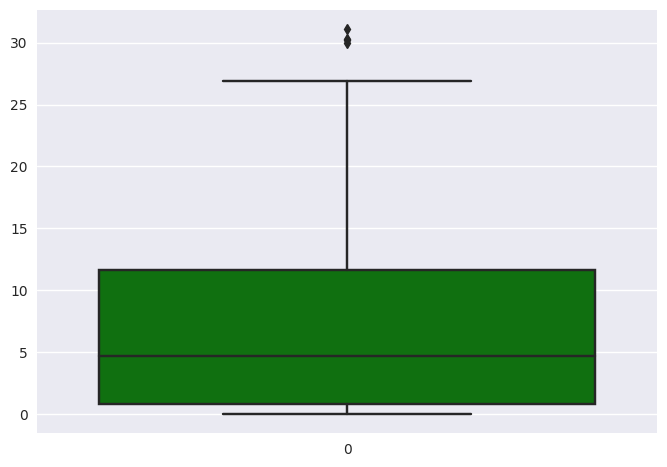

In [47]:
sns.boxplot(df["FWI"] , color="green")

In [48]:
## monthly fire analysis

In [49]:
df["Classes"] = np.where(df["Classes"].str.contains("not fire"),"not fire","fire")

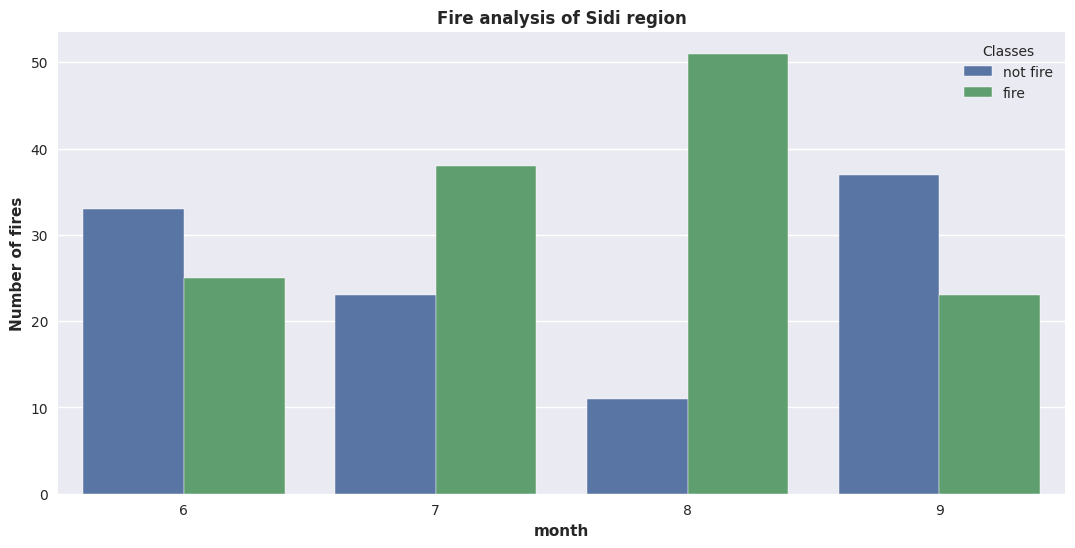

In [50]:
dftemp = df.loc[df["Region"]==1]
plt.subplots(figsize=(13,6))
sns.set_style("whitegrid")
sns.countplot(x="month" , hue = "Classes" ,data = df )
plt.xlabel("month" , weight = 'bold')
plt.ylabel("Number of fires" , weight = "bold")
plt.title("Fire analysis of Sidi region", weight = "bold")
plt.show()

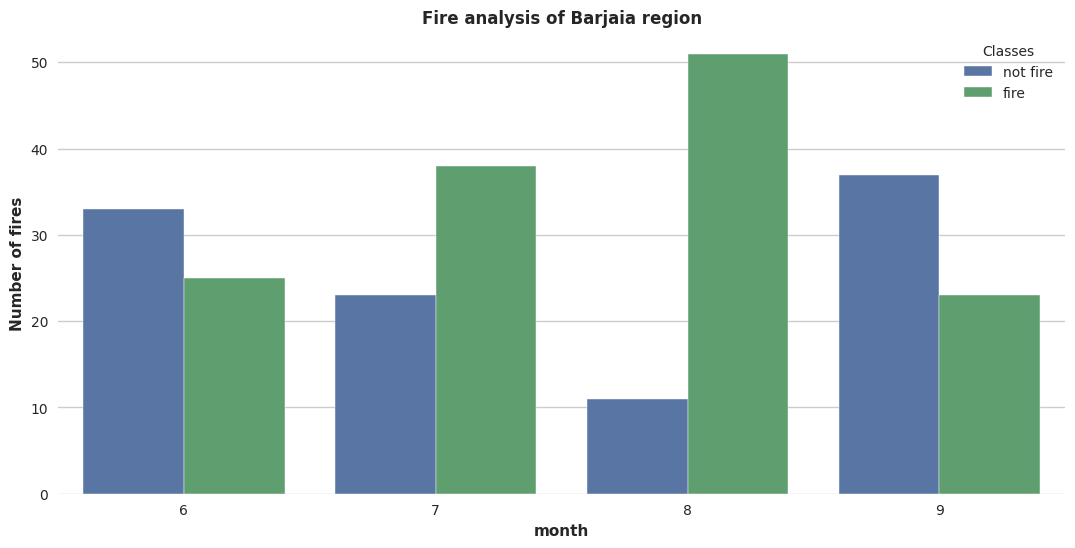

In [51]:
## for barjaia region
dftemp = df.loc[df["Region"]==0]
plt.subplots(figsize=(13,6))
sns.set_style("whitegrid")
sns.countplot(x="month" , hue = "Classes" ,data = df )
plt.xlabel("month" , weight = 'bold')
plt.ylabel("Number of fires" , weight = "bold")
plt.title("Fire analysis of Barjaia region", weight = "bold")
plt.show()

Its observed that in region barjaia and sidi most fire happened in august and july, less fire happened in september.

most of the fire happened in june july and august month.